<h1 align="center">📊 TRỰC QUAN HOÁ DỮ LIỆU</h1>


<h1 align="center">📖 Mục lục</h1>

[I. Tiền xử lý bổ sung](#i)

[II.Phân tích vấn đề và trực quan](#ii)
- [1. Chủ đề 1: Phụ nữ và vấn đề với bệnh trầm cảm](#ii1)

> ## I. Tiền xử lý bổ sung <a id="i"></a>

Import các thư viện hỗ trợ

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Đọc dữ liệu đầu vào

In [2]:
data_folder_path="../../dataset/"

In [3]:
data=pd.read_csv(f"{data_folder_path}/processed_data.csv",sep=",",header=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27872 entries, 0 to 27871
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27872 non-null  int64  
 1   Gender                                 27872 non-null  object 
 2   Age                                    27872 non-null  int64  
 3   City                                   27872 non-null  object 
 4   Profession                             27872 non-null  object 
 5   Academic Pressure                      27872 non-null  int64  
 6   Work Pressure                          27872 non-null  int64  
 7   CGPA                                   27872 non-null  float64
 8   Study Satisfaction                     27872 non-null  int64  
 9   Job Satisfaction                       27872 non-null  int64  
 10  Sleep Duration                         27872 non-null  object 
 11  Di

> ## II. Phân tích vấn đề và trực quan <a id="ii"></a>

### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 1: Phụ nữ và vấn đề với bệnh trầm cảm.</span> <a id="ii1"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Trầm cảm là kết quả của sự tương tác phức tạp giữa nhiều yếu tố bao gồm yếu tố sinh học, tâm lý-xã hội, yếu tố môi trường... Theo đó phụ nữ là nhóm người chịu ảnh hưởng nặng nhất từ các yếu tố trên do sự thay đổi mạnh mẽ của nội tiết tố như hormon estrogen và progesterone trong các giai đoạn quan trọng của cuộc đời như dậy thì. Thêm vào đó phụ nữ cũng là nhóm đối tượng bị ảnh hưởng nặng nề bởi xã hội như kỳ vọng, lạm dụng, bất công - Theo [Vinmec](https://www.vinmec.com/vie/bai-viet/tram-cam-o-phu-nu-nhung-dieu-can-biet-vi).


* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Xác thực vấn đề này giúp mọi người trong xã hội có sự đối xử công bằng và hiểu rõ hơn về tình trạng sức khoẻ tinh thần của phụ nữ. Đồng thời giúp chỉnh bản thân những người phụ nữ có thể nắm rõ các yếu tố ảnh hưởng đến bản thân để có sự điều chỉnh hợp lý đối với cuộc sống bản thân.

* <span style="font-style:italic;">Trực quan hoá</span>

In [5]:

# Tổng số người theo giới tính
total_by_gender = data.groupby('Gender').size()
# Số người trầm cảm theo giới tính
depressed_by_gender = data[data['Depression']==1].groupby('Gender').size()
suicidal_thoughts_by_gender = data[(data['Have you ever had suicidal thoughts ?'] =='Yes')].groupby('Gender').size()
# Tính tỉ lệ phần trăm
depression_rate = (depressed_by_gender / total_by_gender) * 100
suicida_thoughts_rate= (suicidal_thoughts_by_gender / total_by_gender)*100
# Hiển thị
depression_rate

Gender
Female    58.452188
Male      58.633788
dtype: float64

In [6]:
suicida_thoughts_rate

Gender
Female    63.363047
Male      63.230749
dtype: float64

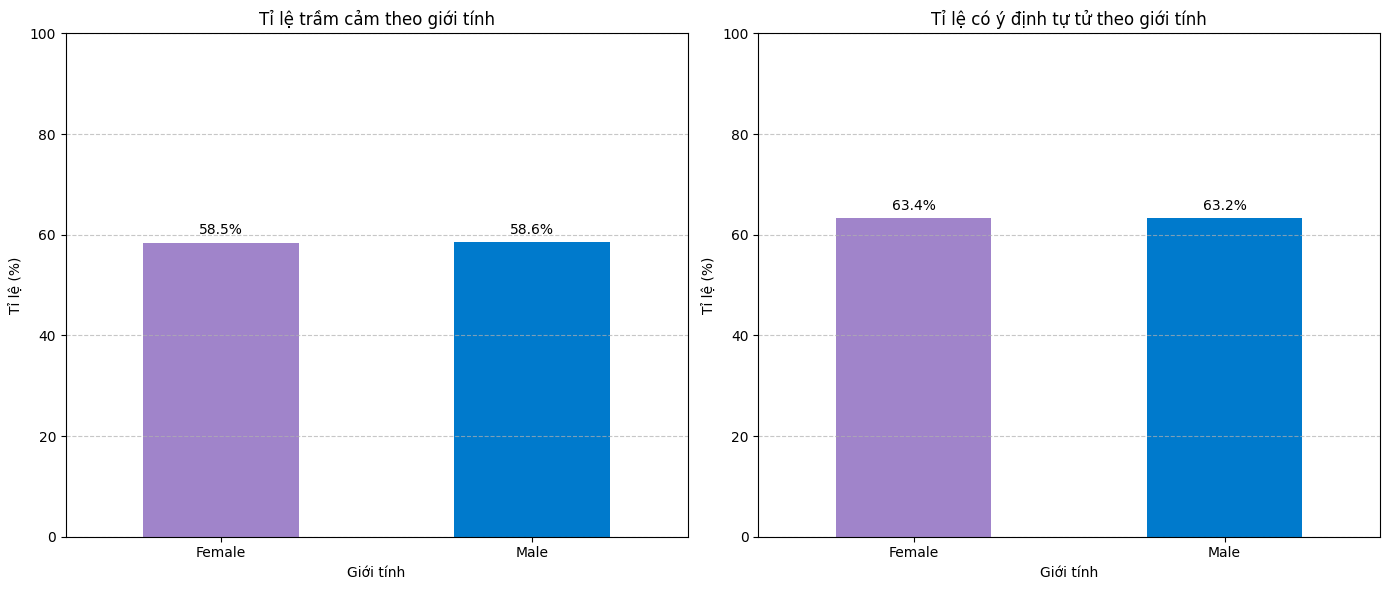

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ tỉ lệ trầm cảm theo giới tính
depression_rate.plot(kind='bar', color=['#A084CA', '#007ACC'], ax=axes[0])
axes[0].set_title('Tỉ lệ trầm cảm theo giới tính')
axes[0].set_ylabel('Tỉ lệ (%)')
axes[0].set_xlabel('Giới tính')
axes[0].set_xticks(range(len(depression_rate.index)))
axes[0].set_xticklabels(depression_rate.index, rotation=0)
axes[0].set_ylim(0, 100)
# Hiển thị giá trị trên đầu mỗi cột
for i, value in enumerate(depression_rate):
    axes[0].text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ tỉ lệ có ý định tự tử theo giới tính
suicida_thoughts_rate.plot(kind='bar', color=['#A084CA', '#007ACC'], ax=axes[1])
axes[1].set_title('Tỉ lệ có ý định tự tử theo giới tính')
axes[1].set_ylabel('Tỉ lệ (%)')
axes[1].set_xlabel('Giới tính')
axes[1].set_xticks(range(len(suicida_thoughts_rate.index)))
axes[1].set_xticklabels(suicida_thoughts_rate.index, rotation=0)
axes[1].set_ylim(0, 100)
for i, value in enumerate(suicida_thoughts_rate):
    axes[1].text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Gender`, `Depression`,`Have you ever had suicidal thoughts ?`
- Nội dung biểu đồ:
    * Biểu đồ so sánh hai vấn đề quan trọng của bệnh trầm cảm giữa hai nhóm đối tượng nam và nữ, sử dụng biểu đồ cột giúp dễ dàng thực hiện so sánh hơn.
    * Đối với vấn đề trầm cảm, biểu đồ cho thấy ở cả hai giới tính thì giới trẻ hiện nay có nguy cơ mắc bệnh trầm cảm đều ở mức cao và hầu như không có sự khác biệt đối với cả hai giới tính.
    * Đối với vấn đề "Đã từng có ý nghĩ đến việc tự sát", giá trị này thậm chí còn cao hơn so với nguy cơ mắc bệnh trầm cảm và không có sự khác biệt to lớn cả hai nhóm giới tính.

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt AI hỗ trợ phân tích**: quan sát biều đồ, không cần nhận xét biểu đồ. Với thông tin thực tế rằng tỉ lệ mắc bệnh trầm cảm ở nữ cao gấp đôi so với nam giới, biểu đồ trên được thực hiện trên một nhóm đối tượng học sinh, sinh viên phần lớn dưới 25 tuổi với đa dạng ngành học và đều là người Ấn Độ. Hãy thực hiện một số phân tích và giải thích cho sự sai lệch này, cũng như có thể nói gì về tình hình trầm cảm đối với giới tính thể hiện qua biểu đồ.

#### 🧠 Phân tích sâu về tình trạng trầm cảm theo giới tính

##### 1. ❓ Tại sao nữ giới thường được cho là có nguy cơ trầm cảm cao hơn?
- Các nghiên cứu toàn cầu chỉ ra rằng **phụ nữ có tỷ lệ trầm cảm cao hơn nam giới khoảng 1.5 đến 2 lần**.
- Một số nguyên nhân chính bao gồm:
  - Biến động hormone (đặc biệt trong tuổi dậy thì, thai kỳ, hậu sản)
  - Áp lực kép giữa công việc và vai trò truyền thống trong gia đình
  - Mức độ **dễ tổn thương tâm lý và biểu hiện cảm xúc cao hơn nam giới**

##### 2. ⚠️ Tuy nhiên, dữ liệu thực tế không phải lúc nào cũng phản ánh như vậy
- Trong nhiều nghiên cứu hiện đại (đặc biệt là ở người trẻ), tỷ lệ trầm cảm giữa hai giới **có thể gần bằng nhau**.
- Điều này có thể do:
  - **Nam giới trẻ ngày nay cũng chịu áp lực lớn**, như áp lực học tập, tài chính, tìm kiếm công việc.
  - **Văn hóa chia sẻ cảm xúc đang dần thay đổi**, khiến nam giới thể hiện vấn đề tâm lý nhiều hơn.
  - Khảo sát ẩn danh giúp giảm thiên lệch "giấu bệnh" ở nam giới.

##### 3. 🌐 Vai trò của bối cảnh xã hội và văn hóa
- Ở các nước như Ấn Độ, nơi hệ thống giáo dục cạnh tranh gay gắt và kỳ vọng xã hội cao:
  - Cả nam và nữ đều có thể bị ảnh hưởng mạnh bởi **áp lực học tập**, **gia đình**, **sự bất ổn tài chính**.
  - Trong môi trường đại học, **giới tính có thể không còn là yếu tố phân biệt mạnh** về mức độ trầm cảm.

##### 4. ✅ Kết luận
> Giới tính có thể ảnh hưởng đến nguy cơ trầm cảm, nhưng trong nhóm sinh viên trẻ, đặc biệt là ở các quốc gia đang phát triển, **trầm cảm có xu hướng ảnh hưởng gần như đồng đều đến cả hai giới**. Việc tập trung phân tích thêm các yếu tố xã hội, tâm lý và môi trường sẽ cho kết quả toàn diện và có giá trị hơn.


### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 2:  Tác động của giấc ngủ.</span> <a id="ii1"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Giấc ngủ đóng vai trò thiết yếu trong việc duy trì sức khỏe thể chất, tinh thần và hiệu suất học tập của sinh viên. Thiếu ngủ kéo dài không chỉ gây mệt mỏi mà còn ảnh hưởng đến khả năng tập trung, mức độ căng thẳng và thậm chí là cảm xúc cá nhân. Trong bối cảnh sinh viên thường xuyên đối mặt với áp lực học tập, hiểu rõ tác động của giấc ngủ là điều cần thiết để xây dựng thói quen lành mạnh và nâng cao chất lượng cuộc sống.

* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Giúp nhận diện mối quan hệ giữa giấc ngủ và các yếu tố tâm lý như lo âu, tâm trạng và khả năng tập trung. Đồng thời đề xuất những khuyến nghị cụ thể để cải thiện sức khỏe tinh thần. Và cũng góp phần định hướng cho các chiến lược hỗ trợ sinh viên tại trường học hoặc trong cộng đồng.

* <span style="font-style:italic;">Trực quan hoá</span>

In [8]:

# Xem xét các giá trị duy nhất trong cột Sleep Duration
print(data["Sleep Duration"].value_counts())
print(data["Sleep Duration"].unique())

Sleep Duration
'Less than 5 hours'    8302
'7-8 hours'            7336
'5-6 hours'            6175
'More than 8 hours'    6041
Others                   18
Name: count, dtype: int64
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


In [9]:
# Loại bỏ các giá trị không xác định
sleep_analyze_df = data[data['Sleep Duration'] != 'Others'].copy()

# Mapping sleep duration từ dạng phân loại sang giá trị số trung bình
sleep_map = {
    "'Less than 5 hours'": 4.5,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 9
}

sleep_analyze_df['Sleep Duration'] = sleep_analyze_df['Sleep Duration'].map(sleep_map)

Số lượng dữ liệu: 27854
Giá trị duy nhất: [5.5 4.5 7.5 9. ]
Thống kê mô tả:
 count    27854.000000
mean         6.487776
std          1.741478
min          4.500000
25%          4.500000
50%          5.500000
75%          7.500000
max          9.000000
Name: Sleep Duration, dtype: float64


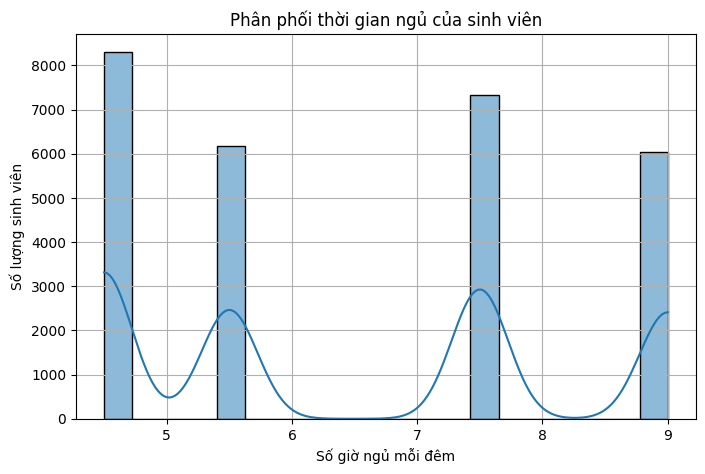

In [10]:
##Vẽ

# Kiểm tra dữ liệu trước khi vẽ
print("Số lượng dữ liệu:", len(sleep_analyze_df))
print("Giá trị duy nhất:", sleep_analyze_df['Sleep Duration'].unique())
print("Thống kê mô tả:\n", sleep_analyze_df['Sleep Duration'].describe())

plt.figure(figsize=(8,5))
sns.histplot(sleep_analyze_df['Sleep Duration'], kde=True, bins=20)
plt.title("Phân phối thời gian ngủ của sinh viên")
plt.xlabel("Số giờ ngủ mỗi đêm")
plt.ylabel("Số lượng sinh viên")
plt.grid(True)
plt.show()

- Thuộc tính sử dụng: `Sleep Duration`
- Nội dung biểu đồ:
    - Biểu đồ là histogram (cột) kết hợp với đường mật độ (KDE).

    - Có 3 đỉnh lớn (mode) ở khoảng:

        - ~4.5–5 giờ → Rất nhiều sinh viên ngủ ít

        - ~7.5 giờ → Nhiều sinh viên ngủ gần đủ giấc

        - ~9 giờ → Một số sinh viên ngủ nhiều hơn

C:\Users\phatl\AppData\Local\Temp\ipykernel_17192\4276852260.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_vs_stress.index, y=sleep_vs_stress.values, palette="coolwarm")


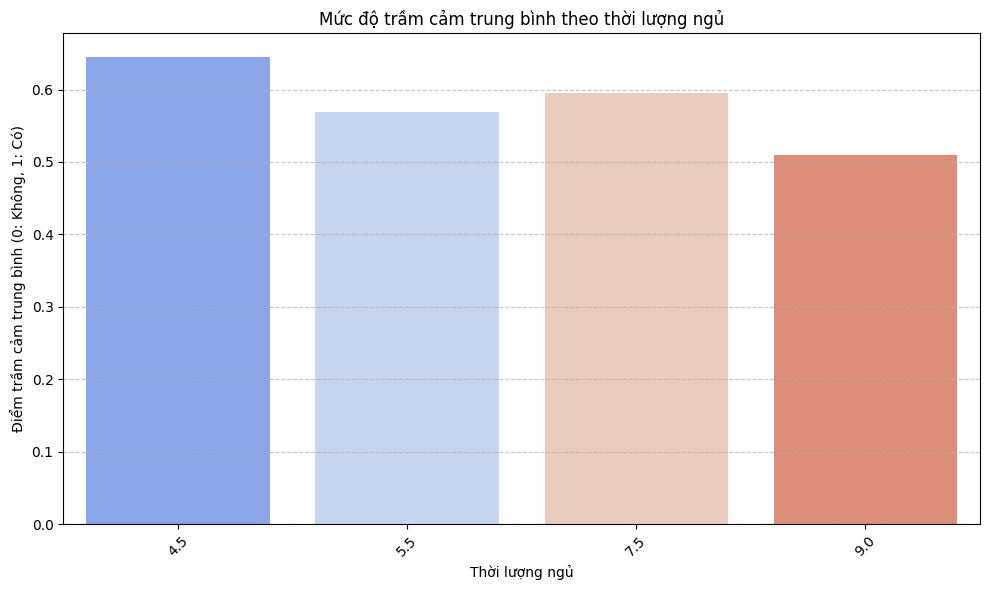

In [11]:
# Kiểm tra các giá trị duy nhất
unique_sleep = sleep_analyze_df['Sleep Duration'].value_counts()

# Tính trung bình điểm trầm cảm (stress) theo từng nhóm Sleep Duration
sleep_vs_stress = sleep_analyze_df.groupby('Sleep Duration')['Depression'].mean().sort_values()

# Vẽ biểu đồ: Sleep Duration vs Average Depression Level
plt.figure(figsize=(10,6))
sns.barplot(x=sleep_vs_stress.index, y=sleep_vs_stress.values, palette="coolwarm")
plt.title('Mức độ trầm cảm trung bình theo thời lượng ngủ')
plt.xlabel('Thời lượng ngủ')
plt.ylabel('Điểm trầm cảm trung bình (0: Không, 1: Có)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Sleep Duration`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ thể hiện sự phân bố thời gian ngủ của sinh viên thông qua hai thành phần:

        - Các cột (histogram) đại diện cho số lượng sinh viên tương ứng với từng mức thời gian ngủ.

        - Đường cong (KDE) thể hiện xu hướng phân bố mượt mà của dữ liệu.

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: Quan sát biểu đồ, không cần mô tả lại biểu đồ. Với thông tin thực tế rằng thiếu ngủ là một trong những yếu tố nguy cơ hàng đầu gây ra stress và trầm cảm, biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, phần lớn dưới 25 tuổi, đến từ nhiều ngành học khác nhau, cho thấy rõ sự khác biệt về điểm trầm cảm trung bình theo thời lượng ngủ.

#### 🧠 Phân tích sâu về ảnh hưởng của giấc ngủ.

##### 1. ❓ Vì sao sinh viên ngủ ít?
- Trong thời đại 4.0, áp lực đồng trang lứa cạnh tranh lẫn nhau khiến cho học sinh bị áp lực trong học tập và công việc: Có thể khiến họ làm việc hoặc học đến khuya.
- Lối sống hiện đại: Mạng xã hội, giải trí, điện thoại, máy tính làm trì hoãn giờ ngủ.
- Sức khỏe tâm thần: Trầm cảm, lo âu có thể gây mất ngủ hoặc giấc ngủ ngắn, rối loạn.

##### 2. ⚠️ Ngủ ít có gây trầm cảm? Hay trầm cảm khiến ngủ ít?
- Ngủ từ 7–8 giờ có mức trầm cảm trung bình thấp nhất → Đây là khung giờ ngủ lý tưởng.
- Ngủ ít hơn 5 tiếng hoặc 5–6 tiếng có tỉ lệ trầm cảm cao hơn rõ rệt → Giấc ngủ ngắn liên quan đến nguy cơ stress cao hơn.
- Một số nhóm như “More than 9 hours” có stress cao có thể do 1 nhóm nhỏ người đối kháng với stress bằng việc đi ngủ.

##### 3. 🌐 Vai trò của bối cảnh xã hội và cá nhân
- Giới tính: Nam hay nữ chịu áp lực khác nhau?
- Ngành học / nghề nghiệp: Một số ngành đòi hỏi thời gian học/làm nhiều hơn.
- Hỗ trợ tâm lý & môi trường học tập: Có thể cải thiện chất lượng giấc ngủ.

##### 4. ✅ Kết luận
> Giấc ngủ trung bình của sinh viên trong bộ dữ liệu thấp hơn khuyến nghị, đặc biệt có một nhóm lớn ngủ ít hơn 5 giờ/ngày. Đây là dấu hiệu cảnh báo cần can thiệp về mặt giáo dục, tổ chức thời gian và chăm sóc tinh thần. Việc ngủ không đủ giấc có thể là chỉ báo sớm của các vấn đề sức khỏe tâm thần như trầm cảm hoặc stress học đường.


### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 3: .</span> <a id="ii1"></a>